# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#Define temperature units as Celsius
units = ["metric", "imperial"]

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    for unit in units: 
        city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

# #         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nogliki
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | nelson bay
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | dryden
Processing Record 13 of Set 1 | pantai cenang
City not found. Skipping...
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | oranjemund
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | inhambane
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | tomatlan
Processing Record 21 of Set 1 | rio branco
Processing R

City not found. Skipping...
Processing Record 41 of Set 4 | port isabel
Processing Record 42 of Set 4 | nirmali
Processing Record 43 of Set 4 | constantia
Processing Record 44 of Set 4 | kapuskasing
Processing Record 45 of Set 4 | labytnangi
Processing Record 46 of Set 4 | bilibino
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | utrik
Processing Record 49 of Set 4 | puerto lempira
Processing Record 0 of Set 5 | lompoc
Processing Record 1 of Set 5 | porbandar
Processing Record 2 of Set 5 | port augusta
Processing Record 3 of Set 5 | chonchi
Processing Record 4 of Set 5 | cooper's town
Processing Record 5 of Set 5 | punta arenas
Processing Record 6 of Set 5 | moranbah
Processing Record 7 of Set 5 | arthur's town
City not found. Skipping...
Processing Record 8 of Set 5 | san borja
Processing Record 9 of Set 5 | abepura
Processing Record 10 of Set 5 | selfoss
Processing Record 11 of Set 5 | taksimo
Processing Record 12 of Set 5 | katabu
Processing Record 13 of Set 

City not found. Skipping...
Processing Record 35 of Set 8 | colon
Processing Record 36 of Set 8 | xai-xai
Processing Record 37 of Set 8 | fortuna
Processing Record 38 of Set 8 | am timan
Processing Record 39 of Set 8 | wisconsin rapids
Processing Record 40 of Set 8 | bel ombre
Processing Record 41 of Set 8 | niafunke
Processing Record 42 of Set 8 | kenai
Processing Record 43 of Set 8 | leava
Processing Record 44 of Set 8 | acajutla
Processing Record 45 of Set 8 | arteche
Processing Record 46 of Set 8 | beroroha
Processing Record 47 of Set 8 | kadoma
Processing Record 48 of Set 8 | port mathurin
Processing Record 49 of Set 8 | rumphi
Processing Record 0 of Set 9 | nizhneudinsk
Processing Record 1 of Set 9 | kota bharu
Processing Record 2 of Set 9 | rio grande
Processing Record 3 of Set 9 | gaigeturi
Processing Record 4 of Set 9 | inarajan village
Processing Record 5 of Set 9 | graaff-reinet
Processing Record 6 of Set 9 | havre
Processing Record 7 of Set 9 | ust-tsilma
Processing Record 

Processing Record 25 of Set 12 | tshikapa
Processing Record 26 of Set 12 | fort-shevchenko
Processing Record 27 of Set 12 | katsuura
Processing Record 28 of Set 12 | yugorsk
Processing Record 29 of Set 12 | tuba city
Processing Record 30 of Set 12 | awjilah
Processing Record 31 of Set 12 | kamaishi
Processing Record 32 of Set 12 | zvishavane
Processing Record 33 of Set 12 | san pedro pochutla
Processing Record 34 of Set 12 | southbridge
Processing Record 35 of Set 12 | sabang
Processing Record 36 of Set 12 | la huacana
Processing Record 37 of Set 12 | karaton
Processing Record 38 of Set 12 | ta`u
-----------------------------
Data Retrieval Complete      
-----------------------------


In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nogliki,51.8333,143.1667,43.20,96,100,6.20,RU,1686622345
1,port elizabeth,-33.9180,25.5701,55.69,65,0,8.05,ZA,1686622512
2,bethel,41.3712,-73.4140,67.64,89,100,9.22,US,1686622573
3,ushuaia,-54.8000,-68.3000,40.66,75,20,24.16,AR,1686622573
4,yellowknife,62.4560,-114.3525,45.12,70,75,6.91,CA,1686622573


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nogliki,51.8333,143.1667,43.20,96,100,6.20,RU,1686622345
1,port elizabeth,-33.9180,25.5701,55.69,65,0,8.05,ZA,1686622512
2,bethel,41.3712,-73.4140,67.64,89,100,9.22,US,1686622573
3,ushuaia,-54.8000,-68.3000,40.66,75,20,24.16,AR,1686622573
4,yellowknife,62.4560,-114.3525,45.12,70,75,6.91,CA,1686622573


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

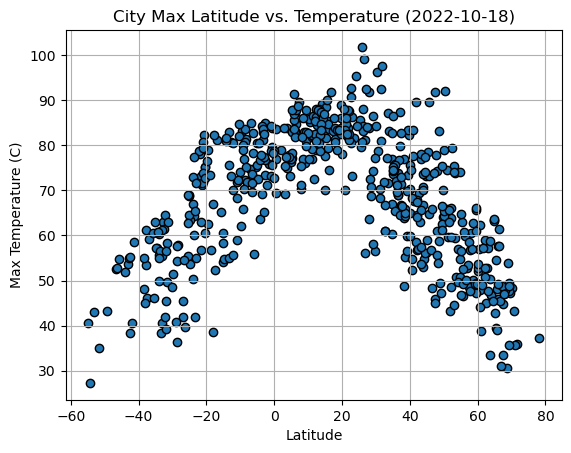

In [45]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

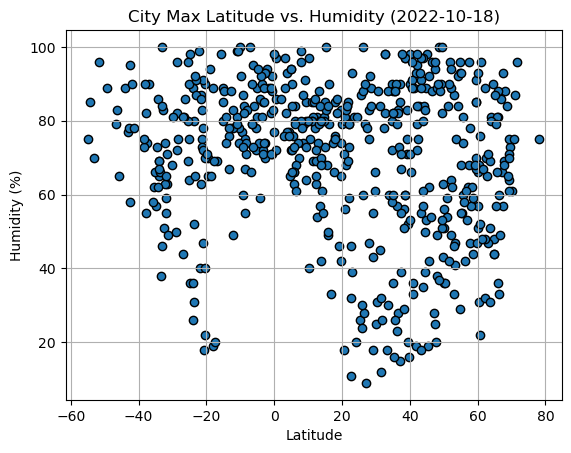

In [46]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

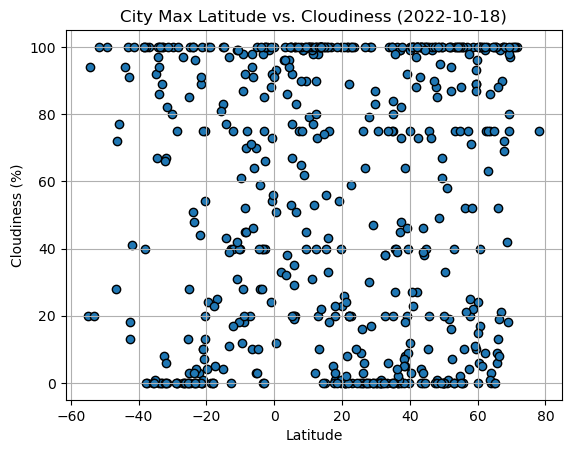

In [47]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

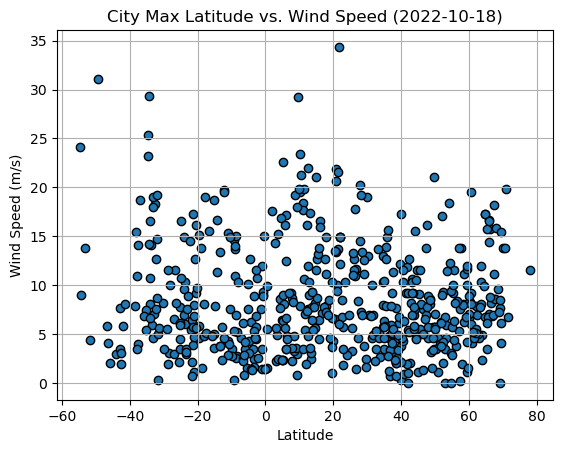

In [48]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


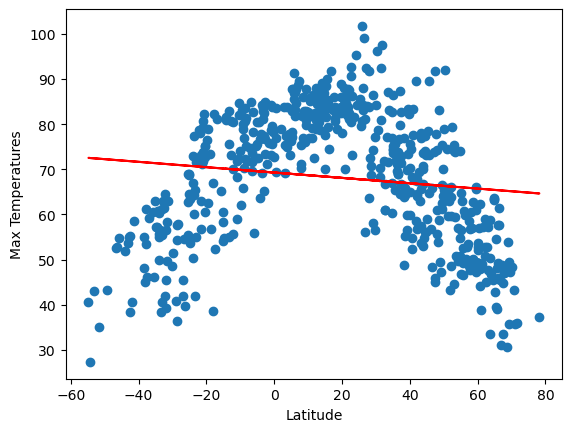

the r value is -0.12941450240342695


In [49]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
y_predicted = slope * x_values + intercept
plt.plot(x_values, y_predicted, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nogliki,51.8333,143.1667,43.20,96,100,6.20,RU,1686622345
2,bethel,41.3712,-73.4140,67.64,89,100,9.22,US,1686622573
4,yellowknife,62.4560,-114.3525,45.12,70,75,6.91,CA,1686622573
5,kavaratti,10.5669,72.6420,85.12,75,100,21.27,IN,1686622574
9,aasiaat,68.7098,-52.8699,30.52,84,42,9.64,GL,1686622574


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,55.69,65,0,8.05,ZA,1686622512
3,ushuaia,-54.8000,-68.3000,40.66,75,20,24.16,AR,1686622573
6,nelson bay,-32.7167,152.1500,63.00,83,100,7.00,AU,1686622574
7,papatowai,-46.5619,169.4708,52.59,79,28,5.77,NZ,1686622574
8,port-aux-francais,-49.3500,70.2167,43.25,89,100,31.07,TF,1686622574


###  Temperature vs. Latitude Linear Regression Plot

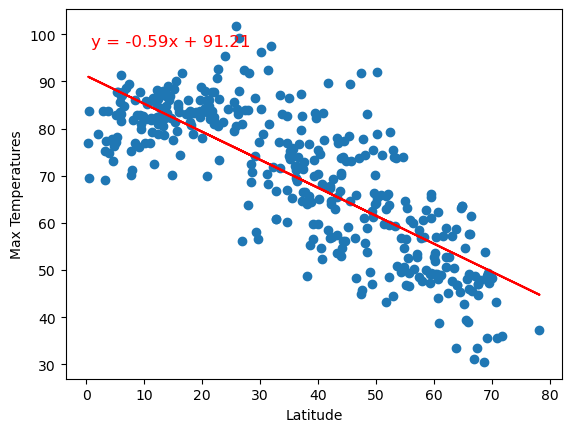

the r value is -0.7887081504106238


In [52]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
y_predicted = slope * x_values + intercept
plt.plot(x_values, y_predicted, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

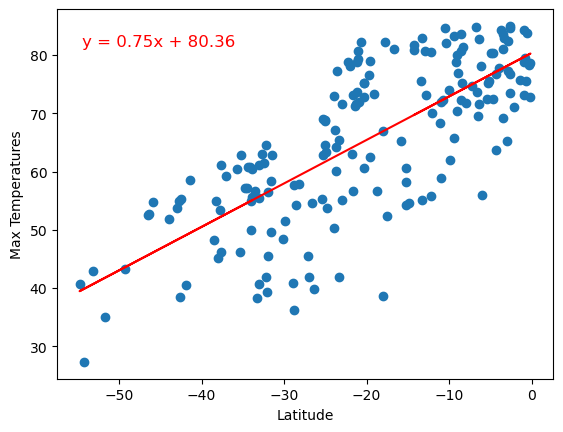

the r value is 0.7489305674401183


In [53]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
y_predicted = slope * x_values + intercept
plt.plot(x_values, y_predicted, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperatures')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

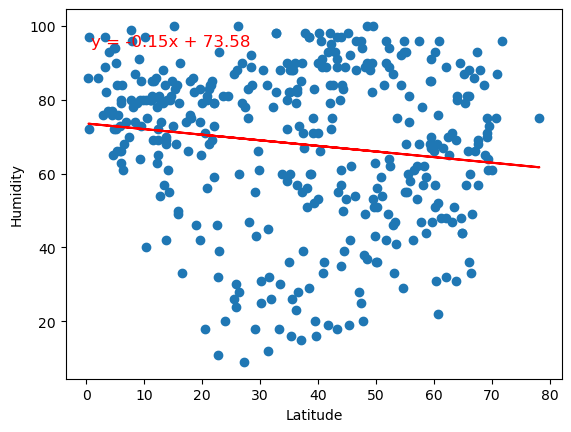

the r value is -0.1391178076862559


In [54]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
y_predicted = slope * x_values + intercept
plt.plot(x_values, y_predicted, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

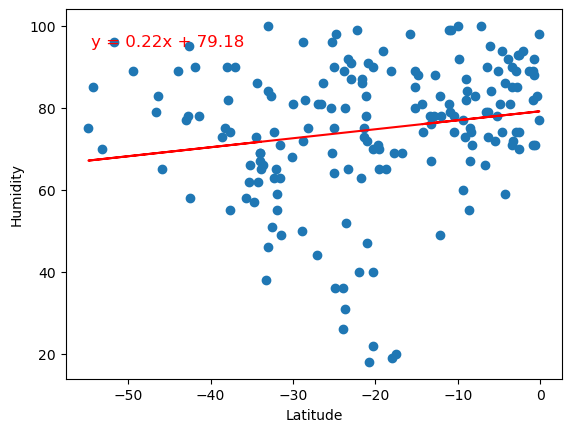

the r value is 0.17558760579734145


In [55]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
y_predicted = slope * x_values + intercept
plt.plot(x_values, y_predicted, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

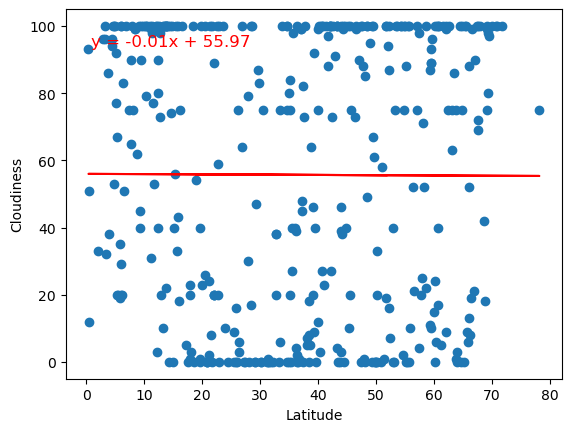

the r value is -0.0038906957501721666


In [56]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
y_predicted = slope * x_values + intercept
plt.plot(x_values, y_predicted, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

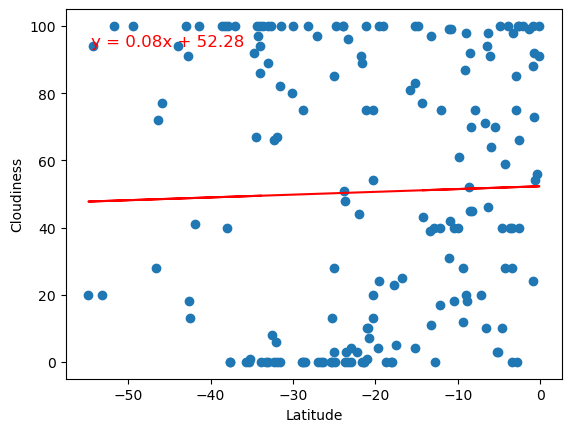

the r value is 0.02850718211045017


In [57]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
y_predicted = slope * x_values + intercept
plt.plot(x_values, y_predicted, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

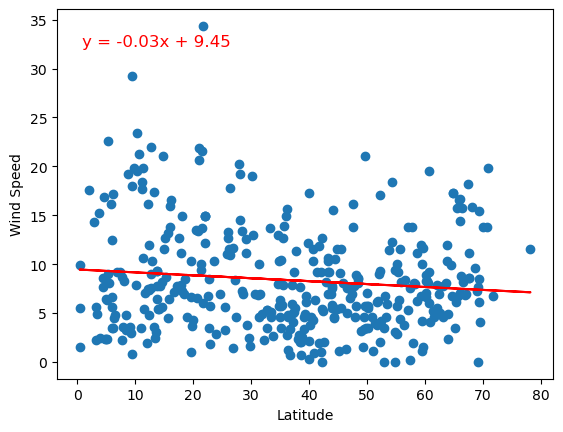

the r value is -0.11148682065968299


In [58]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
y_predicted = slope * x_values + intercept
plt.plot(x_values, y_predicted, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

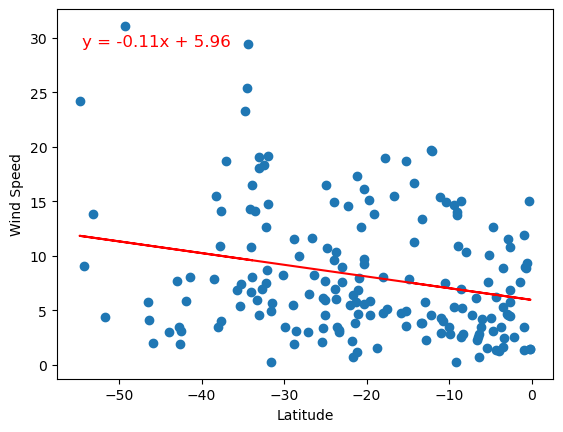

the r value is -0.24815598674754138


In [59]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
plt.scatter(x_values, y_values)
y_predicted = slope * x_values + intercept
plt.plot(x_values, y_predicted, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (0.05, 0.9), xycoords='axes fraction', fontsize=12, color = 'red')

# Display the plot
plt.show()

#print r-value
print(f"the r value is {r_value}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE